# Import the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Analysis

### Import the Dataset

In [ ]:
! unzip archive\ \(1\).zip

Archive:  archive (1).zip
  inflating: bodyfat.csv             


In [ ]:
dataset = pd.read_csv('/content/bodyfat.csv')

### Exploratory Data Analysis

In [ ]:
dataset.shape

(252, 15)

> the dataset has 252 rows and 15 columns

In [ ]:
dataset.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# getting infos about the dataset (null values, data type)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
# checking for missing values
dataset.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

> The Dataset has no missing values

In [ ]:
# getting sstatistical measures on the data
dataset.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,251.000000,251.000000,252.000000,251.000000,251.000000,251.000000,250.000000,250.000000,250.000000,251.000000,250.000000,249.000000,251.000000,249.000000,250.000000
mean,1.055815,19.037849,44.884921,178.190438,70.310757,37.939442,100.572800,92.199200,99.610800,59.294821,38.518800,22.990361,32.222709,28.696386,18.204400
std,0.018679,8.190753,12.602040,27.034801,2.614296,2.287444,7.970109,10.007242,6.310577,4.954547,2.279102,1.342237,2.917904,1.886483,0.892866
min,1.010100,0.000000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,23.100000,15.800000
25%,1.041500,12.450000,35.750000,158.750000,68.250000,36.400000,94.250000,84.525000,95.500000,56.000000,36.925000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.250000,70.000000,38.000000,99.600000,90.900000,99.300000,59.000000,38.450000,22.800000,32.000000,28.700000,18.300000
75%,1.070400,25.250000,54.000000,196.875000,72.250000,39.400000,105.300000,99.175000,103.175000,62.300000,39.875000,24.000000,34.300000,30.000000,18.800000
max,1.108900,40.100000,81.000000,262.750000,77.750000,43.900000,121.600000,122.100000,116.100000,74.400000,45.000000,27.000000,39.100000,33.800000,20.900000


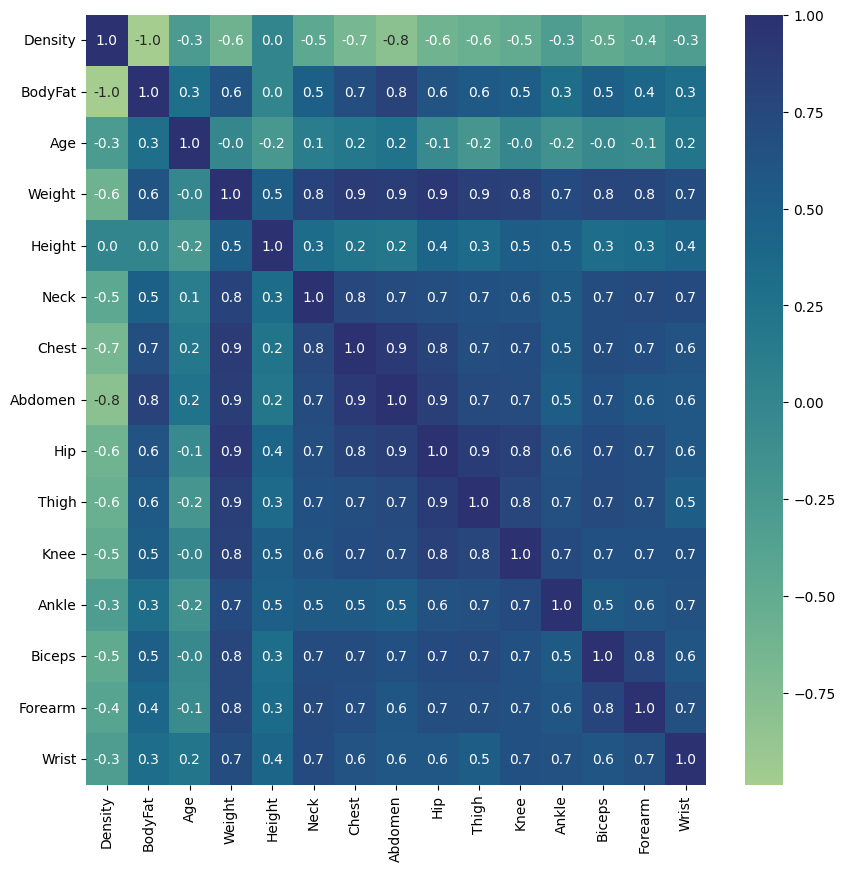

In [ ]:
# determine the correlation between different features in the dataset

corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='crest', fmt='.1f')
plt.show()

In [ ]:
# visualize the relationship between the target and rest of features

def relation_visual(feature, dataset):
  other_features = dataset.columns.drop([feature])
  data = pd.melt(dataset, id_vars=[feature], value_vars=other_features)

  # Create the scatter plots
  g = sns.FacetGrid(data, col="variable", col_wrap=4, sharex=False, sharey=False, height=2, aspect=0.8)
  g = g.map(plt.scatter, feature, "value")

  # Set the x-axis label
  g.set_xlabels(feature)

  # Show the plot
  plt.show()

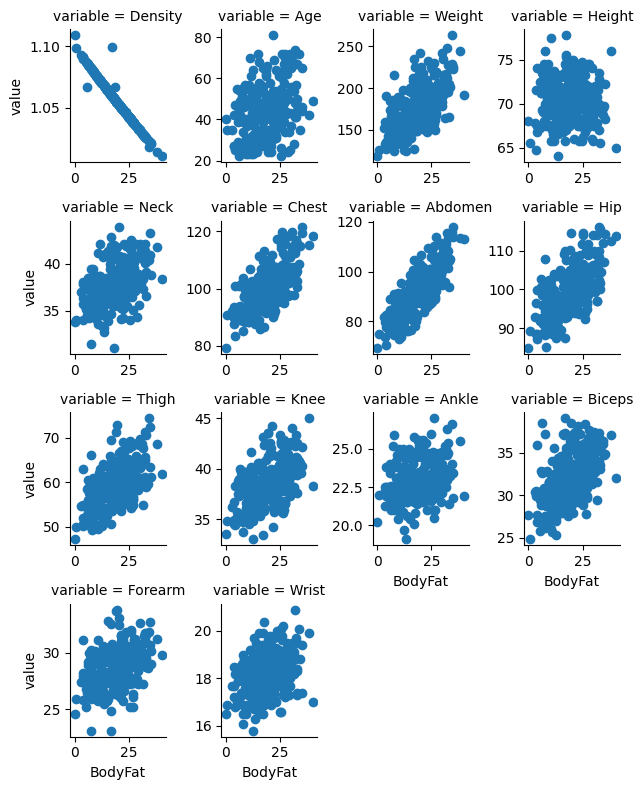

In [ ]:
relation_visual('BodyFat', dataset)

> By interpreting both Correlation heatmap & scatter plot of the target (BodyFat) with the rest of the features, we can see that certain features has weak correlation with the target and has no clear pattern (linear or non-linear). which means that they aren't really relevant to the phenomene.

> These features are: Age, Height, Ankle, Forearm, and Wrist.

# Data Pre-Processing

In [ ]:
# Drop weak causation features
dataset = dataset.drop(['Wrist', 'Forearm', 'Ankle', 'Height', 'Age'], axis=1)

### Split Features & Target

In [ ]:
X = dataset.drop('BodyFat', axis=1)
y = dataset['BodyFat']

### Split to train & test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

In [ ]:
X.shape, X_train.shape, X_test.shape

((252, 9), (189, 9), (63, 9))

# Train

### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluation(y_pred, y_true):
    mse = mean_squared_error(y_pred, y_true)
    mae = mean_absolute_error(y_pred, y_true)
    r2 = r2_score(y_pred, y_true)

    print("mean squared error is: ",mse)
    print("mean absolute error is: ", mae)
    print("r2 score is: ", r2)


In [ ]:
y_pred1 = model.predict(X_train)
evaluation(y_pred1, y_train)

mean squared error is:  2.0034562672279664e-31
mean absolute error is:  5.639228061588096e-17
r2 score is:  1.0


In [ ]:
y_pred2 = model.predict(X_test)
evaluation(y_pred2, y_test)

mean squared error is:  1.469365079365079
mean absolute error is:  0.4904761904761903
r2 score is:  0.9826712388520149


> r2 score equal to 0.982 indicate that the model has succesfully predicted the target for data it never seen before, therefor this model is performing very good!

# Predictive System

In [ ]:
# take input data of the person  
input_data = (1.0812,216.00,39.4,103.6,90.9,107.7,66.2,39.2,37.2)

# covertig input data to numpy array
input_data_np = np.asarray(input_data)

# reshaping the array 
reshaped_input = input_data_np.reshape(1,-1)

# making prediction 
prediction = model.predict(reshaped_input)

print('The Body Fat percentage of this person is :',prediction[0])

The Body Fat percentage of this person is : 7.8


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
